<a href="https://colab.research.google.com/github/ChitranshGuha/Rapido-Bike-Demand-Prediction/blob/main/ML_minorrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#season :
1. spring
2. summer
3. fall
4. winter

#weather :
1. Clear to Partly Cloudy:  
    Ideal, mild weather with little to no clouds.
2. Light Weather:   
    Misty or cloudy, mild disruptions to visibility.
3. Moderate Weather:    
    Light rain, snow, or thunderstorms; moderate disruptions to weather conditions.
4. Severe Weather:    
    Heavy precipitation, ice, fog, or thunderstorms; hazardous conditions requiring caution.

#casual :
  number of non-registered user rentals initiated
#registered :
  number of registered user rentals initiated
#count :
  number of ride request raised on the app for that particular hour.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [74]:
df=pd.read_csv('train.csv')

In [75]:
df.shape

(10886, 12)

In [76]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [78]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01-01-2023 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


#Handling missing values

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


No missing values to handle

##Handling Null values

In [80]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


No null values to handle

#Deriving Features

In [81]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,01-01-2023 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2023,0
1,01-01-2023 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2023,1
2,01-01-2023 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2023,2
3,01-01-2023 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2023,3
4,01-01-2023 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2023,4


In [82]:
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,01-01-2023 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2023,0,1,1,2023
1,01-01-2023 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2023,1,1,1,2023
2,01-01-2023 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2023,2,1,1,2023
3,01-01-2023 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2023,3,1,1,2023
4,01-01-2023 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2023,4,1,1,2023


In [83]:
from datetime import datetime
import calendar


def weekend_or_weekday(year, month, day):

    d = datetime(year, month, day)
    if d.weekday() > 4:
        return 0
    else:
        return 1


df['weekday'] = df.apply(lambda x:weekend_or_weekday(x['year'],x['month'],x['day']),axis=1)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,01-01-2023 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2023,0,1,1,2023,0
1,01-01-2023 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2023,1,1,1,2023,0
2,01-01-2023 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2023,2,1,1,2023,0
3,01-01-2023 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2023,3,1,1,2023,0
4,01-01-2023 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2023,4,1,1,2023,0


In [84]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,01-01-2023 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2023,0,1,1,2023,0,0
1,01-01-2023 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2023,1,1,1,2023,0,0
2,01-01-2023 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2023,2,1,1,2023,0,0
3,01-01-2023 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2023,3,1,1,2023,0,0
4,01-01-2023 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2023,4,1,1,2023,0,0


In [85]:
from datetime import date
import holidays


def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,01-01-2023 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01-01-2023,0,1,1,2023,0,0,0
1,01-01-2023 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01-01-2023,1,1,1,2023,0,0,0
2,01-01-2023 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01-01-2023,2,1,1,2023,0,0,0
3,01-01-2023 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01-01-2023,3,1,1,2023,0,0,0
4,01-01-2023 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01-01-2023,4,1,1,2023,0,0,0


In [86]:
df.drop(['datetime', 'date'],axis=1,inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  time        10886 non-null  int64  
 12  day         10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  year        10886 non-null  int64  
 15  weekday     10886 non-null  int64  
 16  am_or_pm    10886 non-null  int64  
 17  holidays    10886 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 1.5 MB


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'am_or_pm'}>,
        <Axes: title={'center': 'holidays'}>, <Axes: >, <Axes: >]],
      dtype=object)

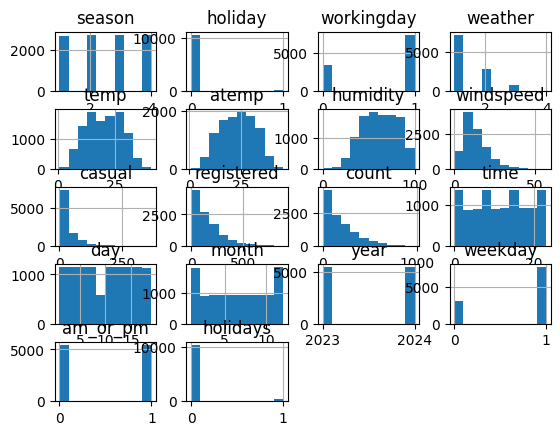

In [88]:
df.hist()

#Handling Outliers

<Axes: ylabel='count'>

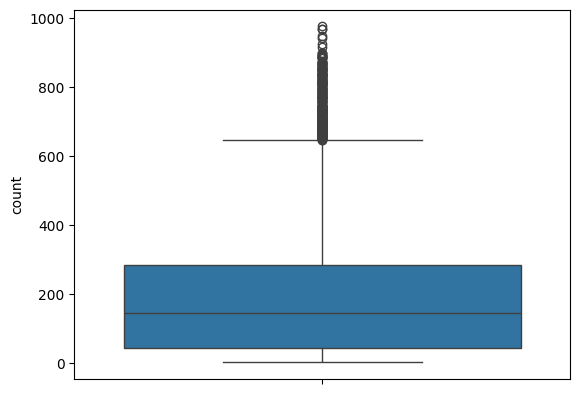

In [89]:
sb.boxplot(df['count'])

<Axes: xlabel='casual'>

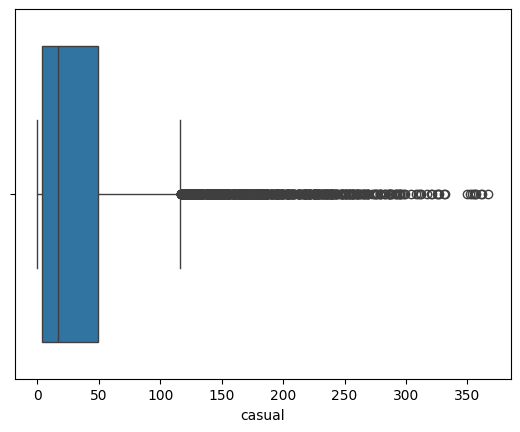

In [90]:
sb.boxplot(x='casual',data=df)

In [91]:
a = df['casual'].quantile(0.25)
b = df['casual'].quantile(0.75)
IQR1 = b - a
lower_bound = a - 0.65 * IQR1
upper_bound = b + 0.65 * IQR1
df = df[(df['casual'] >= lower_bound) & (df['casual'] <= upper_bound)]

<Axes: xlabel='casual'>

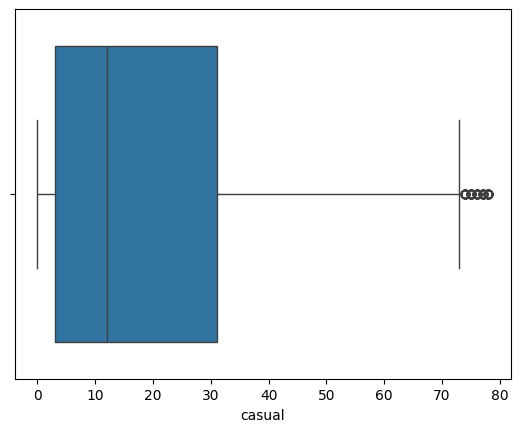

In [92]:
sb.boxplot(x='casual',data=df)

<Axes: xlabel='registered'>

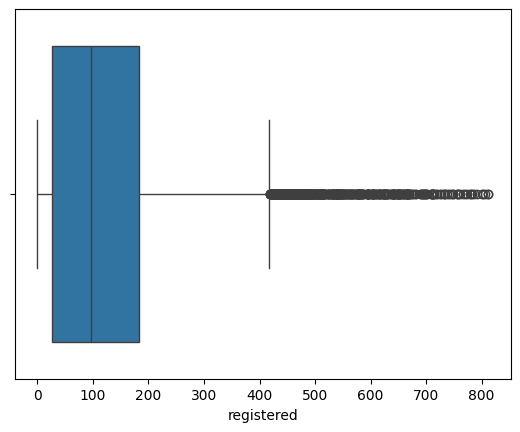

In [93]:
sb.boxplot(x='registered',data=df)

In [94]:
Q1 = df['registered'].quantile(0.25)
Q3 = df['registered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR
df = df[(df['registered'] >= lower_bound) & (df['registered'] <= upper_bound)]

<Axes: xlabel='registered'>

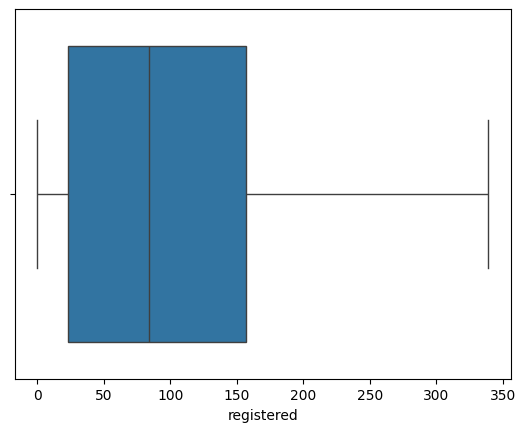

In [95]:
sb.boxplot(x='registered',data=df)

<Axes: xlabel='count'>

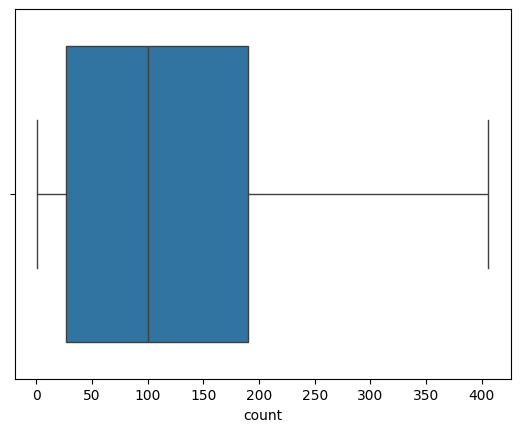

In [96]:
sb.boxplot(x='count',data=df)

In [97]:
df['count'] = df['casual'] + df['registered']

<Axes: xlabel='count'>

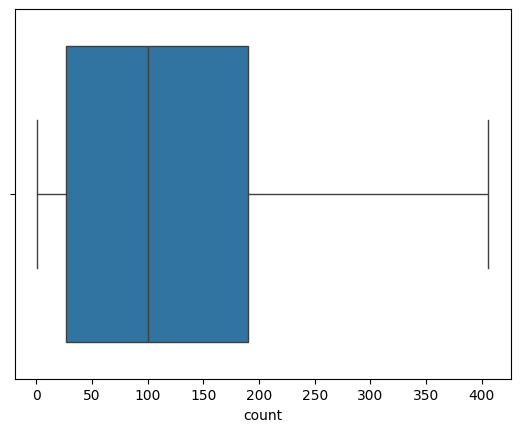

In [98]:
sb.boxplot(x='count',data=df)

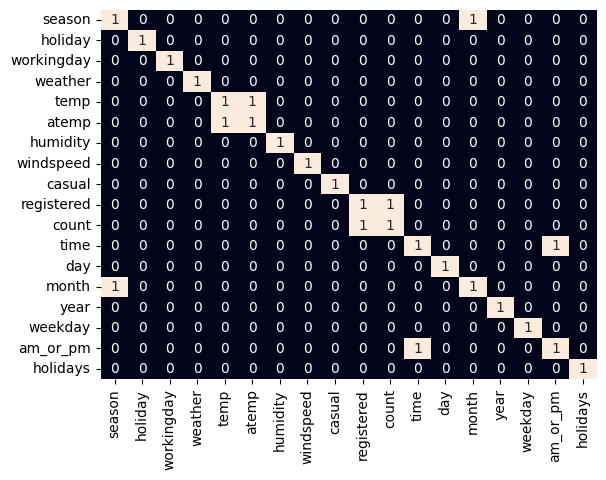

In [99]:
sb.heatmap(df.corr() > 0.8,annot=True,cbar=False)
plt.show()

This will lead to a situation of data leakage if we do not handle this situation. So, let’s remove this ‘registered’ column from our feature set and also the ‘time’ feature.

<ipython-input-100-88bbf1483f7a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
<ipython-input-100-88bbf1483f7a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


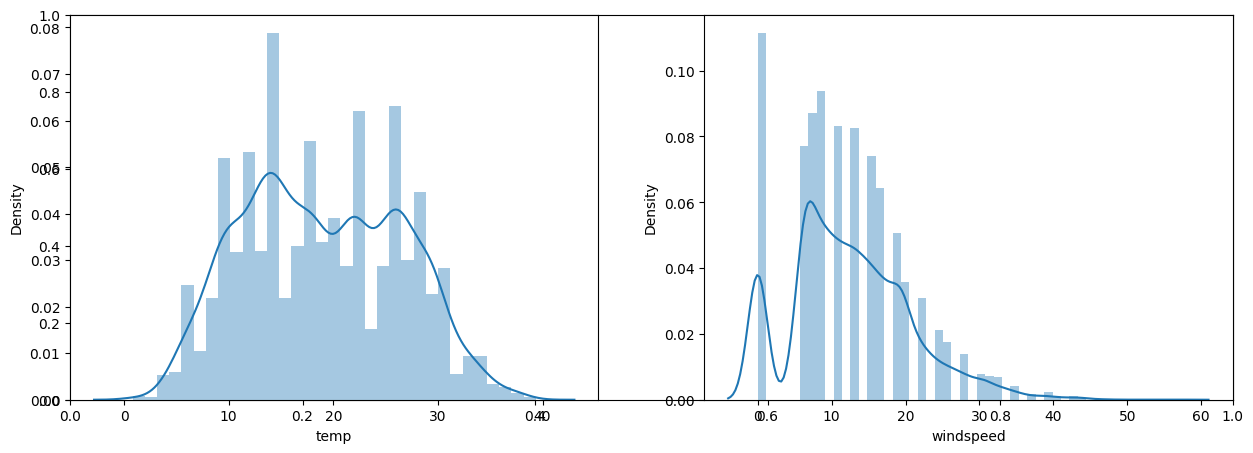

In [100]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()


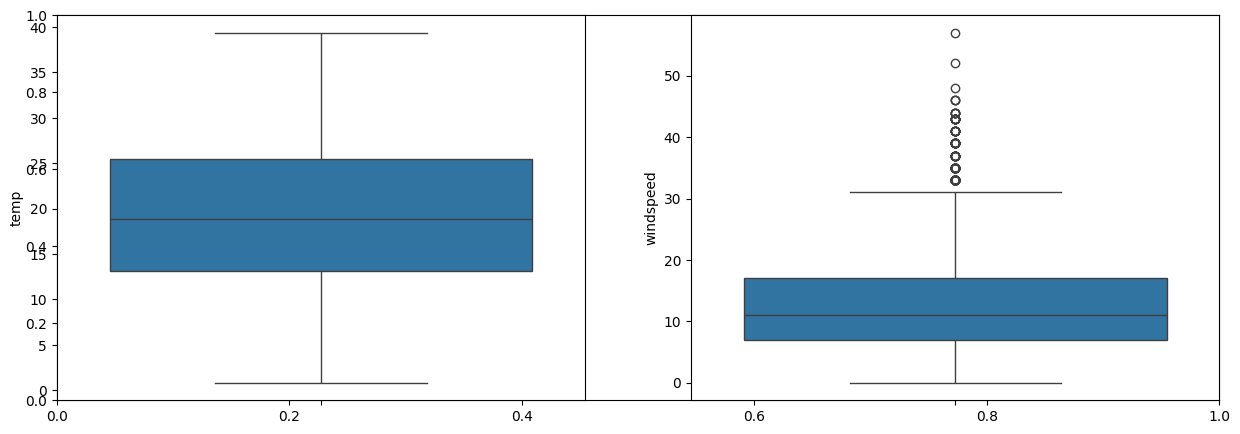

In [101]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col])
plt.show()

In [102]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]

therefore outliers in registered, casual, windspeed and count is removed

#Model Training

In [103]:
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,target,test_size = 0.1,random_state=22)
X_train.shape, X_val.shape

((7581, 15), (843, 15))

Normalization is an essential step in the preprocessing of data for machine learning models, and it is a feature scaling technique. Normalization is especially crucial for data manipulation, scaling down, or up the range of data before it is utilized for subsequent stages in the fields of soft computing, cloud computing, etc. Min-max scaling and Z-Score Normalisation (Standardisation) are the two methods most frequently used for normalization in feature scaling

-GFG

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [105]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error as mae

models = [LinearRegression(), XGBRegressor(), Lasso(),
          RandomForestRegressor(), Ridge(), RidgeCV(),
          ElasticNet(), LassoCV(),
          GradientBoostingRegressor(), AdaBoostRegressor(),
          ExtraTreesRegressor(), SVR(), NuSVR(),
          MLPRegressor(), KNeighborsRegressor(),
          GaussianProcessRegressor(), LGBMRegressor()]

for model in models:
    model.fit(X_train, Y_train)

    print(f'{model} : ')

    train_preds = model.predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = model.predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()


LinearRegression() : 
Training Error :  44.283674452502396
Validation Error :  43.29786730801698

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  21.62335205078125
Validation Error :  36.39021301269531

Lasso() : 
Training Error :  44.36988062859687
Validation Error :  43.3114853

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor() : 
Training Error :  37.54878763823274
Validation Error :  37.09259673497554

KNeighborsRegressor() : 
Training Error :  36.85096952908587
Validation Error :  45.72384341637011

GaussianProcessRegressor() : 
Training Error :  0.31967131877110877
Validation Error :  128.27253601916692

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 7581, number of used features: 15
[LightGBM] [Info] Start training from score 119.060678
LGBMRegressor() : 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training Error :  29.67939690996741
Validation Error :  34.49124395577772



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Model Performance Summary:

- **Best Models (Validation Error)**:
  - **XGBRegressor**: Validation Error = 36.39 (Good balance between training and validation performance)
  - **LGBMRegressor**: Validation Error = 34.49 (Strong performance, consistent results)
  - **RandomForestRegressor**: Validation Error = 35.39 (Solid performance with lower validation error compared to other linear models)

- **Overfitting**:
  - **ExtraTreesRegressor** & **GaussianProcessRegressor**: Very low training errors (0.32), but high validation errors, indicating overfitting.

- **Underperforming Models**:
  - **ElasticNet** and **AdaBoostRegressor**: Higher validation errors, may benefit from hyperparameter tuning.

- **Good Performance with Regularization**:
  - **XGBRegressor**, **RandomForestRegressor**, and **LGBMRegressor** show balanced performance and should be further tuned for optimization.


---

The predictions made by the RandomForestRegressor are really amazing compared to the other model. In the case of RandomForestRegressor, there is a little bit of overfitting but we can manage it by hyperparameter tuning.

#Applying of test.csv

In [106]:
df1=pd.read_csv('test.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [107]:
# Convert the 'datetime' column to datetime type
df1['datetime'] = pd.to_datetime(df1['datetime'])

df1['year'] = df1['datetime'].dt.year
df1['month'] = df1['datetime'].dt.month
df1['day'] = df1['datetime'].dt.day
df1['weekday'] = df1['datetime'].dt.weekday
df1['am_or_pm'] = df1['datetime'].dt.hour.apply(lambda x: 1 if x < 12 else 0)  # 1 for AM, 0 for PM

# Drop the datetime column as it's no longer needed
df1 = df1.drop(columns=['datetime'])

# Now ensure the features are the same as in the training set (reorder columns if necessary)
df1 = df1[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'weekday', 'am_or_pm']]

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int32  
 9   month       6493 non-null   int32  
 10  day         6493 non-null   int32  
 11  weekday     6493 non-null   int32  
 12  am_or_pm    6493 non-null   int64  
dtypes: float64(3), int32(4), int64(6)
memory usage: 558.1 KB


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8424 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8424 non-null   int64  
 1   holiday     8424 non-null   int64  
 2   workingday  8424 non-null   int64  
 3   weather     8424 non-null   int64  
 4   temp        8424 non-null   float64
 5   atemp       8424 non-null   float64
 6   humidity    8424 non-null   int64  
 7   windspeed   8424 non-null   float64
 8   casual      8424 non-null   int64  
 9   count       8424 non-null   int64  
 10  day         8424 non-null   int64  
 11  month       8424 non-null   int64  
 12  year        8424 non-null   int64  
 13  weekday     8424 non-null   int64  
 14  am_or_pm    8424 non-null   int64  
 15  holidays    8424 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 1.1 MB


In [110]:
X_train = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'weekday', 'am_or_pm']]
y_train = df['count']  # The target variable

# Train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model for later use
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [111]:
# Drop unnecessary columns from train (e.g., target columns) and test
df1 = df1[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'weekday', 'am_or_pm']]
df = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'weekday', 'am_or_pm']]  # ensure it has same columns as df1

In [118]:
# Load the trained model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Prepare the test data (df1)
X_test = df1[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'weekday', 'am_or_pm']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

predictions = model.predict(X_test_scaled)

print(predictions)


[78.994 78.994 78.994 ... 82.21  82.21  82.21 ]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [116]:
# Fit scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(df1)


In [117]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(8424, 13)
(6493, 13)
